## Monge maps for GW - Complementary study of the quadratic cost in 1D
This is a reproduction of the figures from our paper [On the existence of Monge maps for the Gromov-Wasserstein problem](https://arxiv.org/abs/2210.11945).

In [1]:
from utils import experiment_GD, plot_pi       # (Figure 3)
from utils import experiment_bimap, get_input  # (Figure 4)
from utils import exp_instability              # (Figure 5)

### Counter-examples for the optimality of monotone plans (Figure 3)

When generating random discrete measures in dimension 1 with $N=M$ and $a=b=\mathbb{1}_N$, it seems to be the case with high probability that the optimal solution of GW is either the monotone non-decreasing rearrangement $\pi_\text{mon}^\oplus$ or the monotone non-increasing one $\pi_\text{mon}^\ominus$. 
While this claim is true for $N=1,2$ and $3$,
a counter-example for $N\geq 7$ points has recently been exhibited in [BHS22]. We further propose a procedure to automatically obtain additional counter-examples by performing a gradient descent over the space of empirical distributions over $\mathcal{X}\times \mathcal{Y}=\mathbb{R}\times\mathbb{R}$ of the form ${\pi=\frac{1}{N}\sum_{i=1}^{N}\delta_{(x_{i},y_{i})}}$. 
Such plans $\pi$ can be seen as the identity mapping between vectors $X=(x_1,\dots,x_N)$ and $Y=(y_1,\dots,y_N)$, and we therefore note $\pi=\operatorname{id}(X,Y)$. Denoting by $c_{\operatorname{GW}}$ the functional that takes a correspondence plan and returns its cost on the GW problem, we then define the objective function $\mathcal{F}:\mathbb{R}^N\times\mathbb{R}^N\to\mathbb{R}$ by
$$\mathcal{F}(X,Y)\triangleq c_{\operatorname{GW}}(\pi)-\min \left\{ c_{\operatorname{GW}}(\pi_\text{mon}^\oplus),\, c_{\operatorname{GW}}(\pi_\text{mon}^\ominus)\right\},$$
where $\pi=\operatorname{id}(X,Y)$ and $\pi_\text{mon}^\oplus$ and $\pi_\text{mon}^\ominus$ are the monotone rearrangements between $X$ and $Y$.
This quantifies how well the plan $\pi$ compares to the two monotone rearrangements. We generate $N$ points at random in $[0,1]^2$ and then perform a simple gradient descent over the positions of the points $(X,Y)=(x_{i},y_{i})_i$ following the objective
$$\min_{X,Y \in \mathbb{R}^N}\ \mathcal{F}(X,Y)\,.$$
This functional becoming negative means that we have found a plan $\pi_f$ that is better on the GW functional than the two monotone rearrangements between its marginals $X_f$ and $Y_f$.

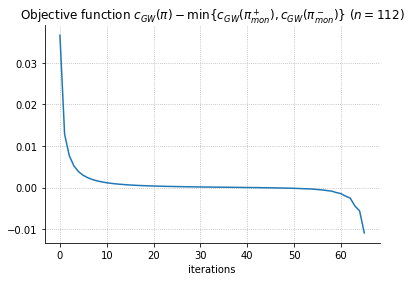

In [2]:
param_GD = {
    'n': 112,
    'eta': 26,
    'n_iter_max': 250,
    'threshold': -1,
    'seed': 4216334416,
    'init_GD': "random",
    '_show_obj': True
}
res_exp_GD = experiment_GD(**param_GD)

During the descent, the plan $\pi$ has difficulties getting out of what seems to be a saddle point consisting in being (close to) the monotone rearrangements between its marginals; but once $\mathcal{F}(\pi)$ becomes negative, *i.e.* $\pi$ becomes slightly adversarial, the objective function decreases exponentially fast. We therefore stop the descent once $\mathcal{F}(\pi)$ has reached a certain value $t$.

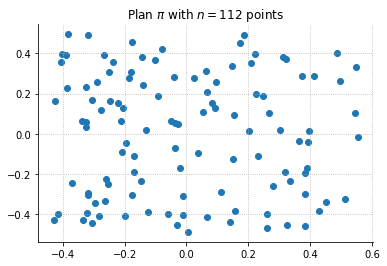

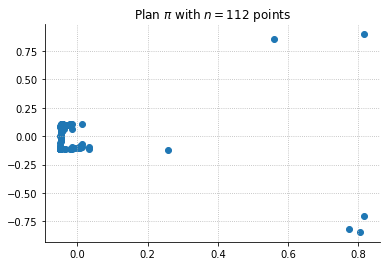

In [4]:
plot_pi(res_exp_GD['pi_list'][0])
plot_pi(res_exp_GD['pi_list'][-1])
pi_list = res_exp_GD['pi_list']

It is also worth noting that the marginals of the adversarial plan are similar to the counter-example proposed in [BHS22], where both measures have their mass concentrated near zero, except for one outlier for $X$ and two for $Y$, one on each tail.

### Computation of non-deterministic optimal plans (Figure 4)

We recall our Theorem 5 in the one-dimensional case:

**Theorem 5** (Existence of an optimal bi-map for the quadratic cost in 1D).
Let $\mu, \nu\in \mathcal{P}(\mathbb{R})^2$ two measures with compact supports. Suppose that $\mu\ll\mathcal{L}^1$. Let $\pi^\star$ be a solution of (GW-Q) and $m^\star\triangleq\int x'y' \,\mathrm d\pi^\star(x', y')$. Then:
- if $m^\star\neq 0$, there exists an optimal plan that is induced by a bi-map which is also a map/anti-map;
- if $m^\star=0$, there exists an optimal plan that is induced by a bi-map.

We believe that this theorem is tight, in the sense:

**Conjecture 1.** There exists $\mu$ and $\nu$ for which optimal correspondence plans for (GW-Q) are not maps but rather a union of two graphs (that of two maps or one map and one anti-map); and this even if $\mu$ has a density.

We leverage the adversarial examples from before: we compute an approximation of the optimal plan for the GW functional and show that it exhibits a bi-map structure that cannot be reduced to a map.
In order to approximate numerically the case of a measure which has density w.r.t. the Lebesgue measure, we convolve our distributions $\mu=(X_f,\mathbb{1}_N)$ and $\nu=(Y_f,\mathbb{1}_N)$ with a Gaussian of standard deviation $\sigma$ and represent it in Eulerian coordinates; that is we evaluate the closed form density on a fine enough grid.

When $\sigma$ is large, the optimal correspondence plan for GW is probably induced by a monotone map, as it is the case very frequently empirically; on the contrary, because of the adversarial nature of $\pi_f$ for the sub-optimality of $\pi_\text{mon}^\oplus$ and $\pi_\text{mon}^\ominus$, we know that when $\sigma$ is sufficiently small, the optimal correspondence plan is not a monotone rearrangement. Still, it could be the case that this optimal plan is a map, but not a monotone one, and there is *a priori* no reason to believe that $\pi_f$ will agree with Conjecture 1. Surprisingly, it sometimes does, as numerical experiments below suggest.

We compute an approximation of the optimal plan $\pi^\star$ for the GW functional by leveraging the fact that it is a solution of its associated linearized problem: a minimizer of the GW functional is given by
$$\operatorname{arg\,min}\ \Big\{ \operatorname{GW}(\pi_{m}^\star)\ \big\vert\ \pi_m^\star \in \operatorname{arg\,min}_{\pi \in U(a,b)}\ \langle C_{\operatorname{GW}(m)},\,\pi\rangle \,,\, m \in [m_\text{min},m_\text{max}]\Big\}  \,,$$
where ${(C_{\operatorname{GW}(m)})_{i,j}=-x_i^2y_j^2-4m x_iy_j}$.

**(a)** We first plot the optimal correspondence plan $\pi^\star$ starting from an adversarial plan with both marginals convolved as to simulate densities:

100%|██████████| 2000/2000 [11:03<00:00,  3.02it/s]


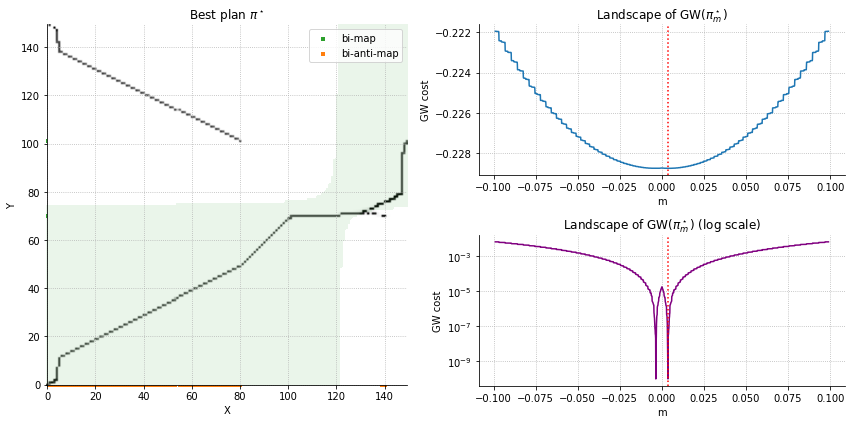

In [3]:
pi_advers = get_input("beinert15")
pi_advers[:,[1,0]] = pi_advers[:,[0,1]]
res = experiment_bimap(pi_advers, convolve_y=True, n_pts=150, n_M=2000, sigma=5e-3, _show_convo=False, _show_plan=True, eps_plan=1e-10)

It is worth mentioning that both minima of the functional correspond to correspondence plans that are strict bi-maps.

We also plot the submodularity regions of the linearized GW cost function with parameter $m(\pi^\star)$ as an overlay and we observe that when the optimal plan gives mass to a region where the cost is submodular (resp. supermodular), it has a monotone non-decreasing (resp. non-increasing) behaviour in this region.


**(b)** We then plot the optimal correspondence plan $\pi^\star$ starting from an adversarial plan with only the first marginal convolved and the second marginal being a sum of Dirac measures:

100%|██████████| 2000/2000 [11:07<00:00,  3.00it/s]


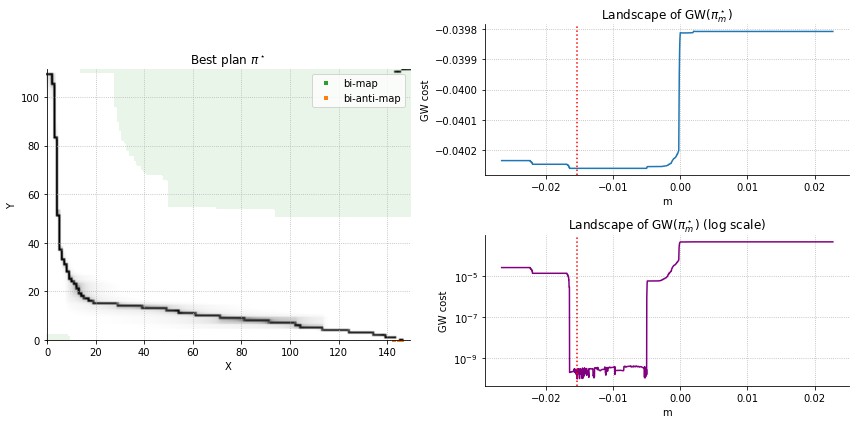

In [4]:
pi_advers = get_input("adversarial", pi_list)
res = experiment_bimap(pi_advers, convolve_y=False, n_pts=150, n_M=2000, sigma=5e-3, _show_convo=False, _show_plan=True, eps_plan=1e-10)

In both cases, we observe that $\pi^\star$ is not a map but a bi-map instead. Note that in case **(b)**, $\nu$ being atomic, there cannot be a map from $\nu$ to $\mu$, so in both **(a)** and **(b)** we numerically exhibit an instance where there is *a priori* no map from neither $\mu$ to $\nu$ nor $\nu$ to $\mu$.

### Instability of the monotone plans (Figure 5)

The above study demonstrates that there exist probability measures $\mu$ and $\nu$ for which property
    $$P(\mu,\nu)\text{ : }\quad \pi_\text{mon}^\oplus \text{ or } \pi_\text{mon}^\ominus \text{ is an optimal correspondence plan between }\mu\text{ and }\nu$$
does not hold. However, as it is very likely in practice when generating empirical distributions at random, one could ask if property $P$ is at least stable, *i.e.* if when we have $\mu_0$ and $\nu_0$ satisfying $P(\mu_0,\nu_0)$ there is a small ball around $\mu_0$ and $\nu_0$ (for a given distance, say Wasserstein-2) inside which property $P$ remains valid. 

A counter-example can actually be obtained from the counter-example given in [BHS22] with $N=7$ points and $\varepsilon=10^{-2}$, that we convolve with a Gaussian of standard deviation $\sigma$ as before. We then plot as a function of $m\in[m_\text{min},m_\text{max}]$ the (true) GW cost of a plan $\pi_m^\star$, optimal for the linearized GW problem $\pi^\star_m\in\operatorname{arg\,min}_{\pi}\ \langle C_{\operatorname{GW}(m)},\,\pi\rangle$. The minimum values of this graph are attained by the correlations of optimal correspondence plans. Hence if $\sigma$ is small, this optimal plan is not a monotone rearrangement by construction and the minima are not located on the boundary of the domain.
On the contrary, when $\sigma$ is large, 
a monotone rearrangement is optimal again. In order to study the phase transition, we plot the landscape of $m\mapsto \operatorname{GW}(\pi^\star_m)$ while gradually increasing the value of $\sigma$.

100%|██████████| 150/150 [00:17<00:00,  8.58it/s]


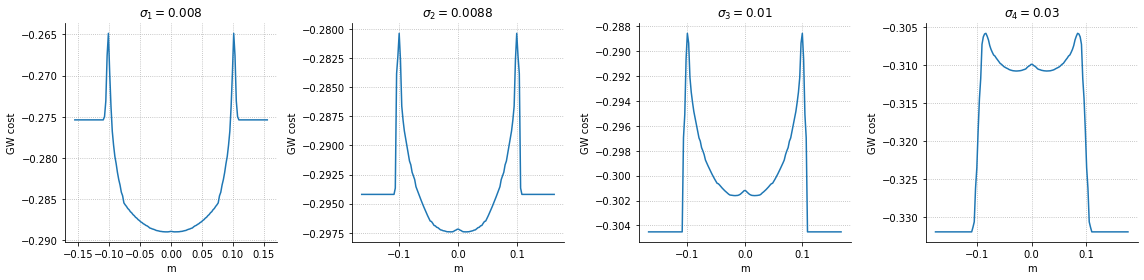

In [2]:
pi_advers = get_input("beinert7")
sigma_list = [8e-3, 8.8e-3, 1e-2, 3e-2]
exp_instability(pi_advers, sigma_list, n_pts=100, n_M=150)

It is worth noting that there is an incentive for optimal plans at correlations close to $m_\text{min}$ or $m_\text{max}$ to be the monotone rearrangements, as the horizontal portions of the plot suggest. More importantly, it can be observed that when $\sigma=\sigma_3$ or $\sigma_4$, the monotone rearrangements are optimal, as their correlations realize the minimum of $m\mapsto \operatorname{GW}(\pi^\star_m)$; unlike for $\sigma_1$ and $\sigma_2$, for which the minimum value of the plot is located near zero. Hence there should exist a $\sigma_0\in(\sigma_2,\sigma_3)$ for which the convolved measures have both $\pi_\text{mon}^\oplus$, $\pi_\text{mon}^\ominus$ and another $\pi_0$ as optimal correspondence plans; it is direct that property $P$ does not hold in the neighbourhood of these specific measures $\mu_0$ and $\nu_0$.

### References
[BHS22] Robert Beinert, Cosmas Heiss, and Gabriele Steidl. On assignment problems related to Gromov-Wasserstein distances on the real line.
<!-- [Vay20] Titouan Vayer. A contribution to optimal transport on incomparable spaces. arXiv preprint arXiv:2011.04447, 2020. -->